In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

1. How do meteorological conditions, such as wind speed and precipitation, impact noise levels in different locations of Leuven?

2. How do noise levels vary across different times of day and days of the week in Leuven? On which days do we expect higher amount of noise level?

3. How does the noise level vary across different times of the year? Are there any particular months or seasons when the noise level is higher or lower?

4. Is there any spatial patterns in noise levels within the area? Which location is consistently noisier than others?
5. How does the density and location of restaurants, bars and other destinations in the neighborhoods affect noise levels? 
6. Are there any temporal patterns in noise levels? For example, are there any specific hours of the night when the noise level tends to be higher or lower?
7. Can we identify any patterns in noise levels across different times of the day (not just nighttime)? For example, do noise levels tend to be higher during rush hour?

## Loading files

In [67]:
def merge_csv_files(directory_path):
    """
    Merges all CSV files in a directory into a single pandas DataFrame.
    
    Args:
    directory_path (str): The directory path containing the CSV files.
    
    Returns:
    merged_df (pandas.DataFrame): The merged pandas DataFrame of all CSV files in the directory.
    """
    dfs = []

    # loop through each file in the directory
    for file in os.listdir(directory_path):
        # check if the file is a CSV file
        if file.endswith('.csv'):
            file_path = os.path.join(directory_path, file)
            if directory_path.endswith("dataverse_file"):
                df = pd.read_csv(file_path, delimiter=",")
            else:
                df = pd.read_csv(file_path, delimiter=";")
            dfs.append(df)

    # concatenate all dataframes 
    merged_df = pd.concat(dfs, ignore_index=True)

    return merged_df


In [24]:
# Noise data

folder_path = '/Users/anhphuong/Documents/KUL/Modern Data Analytics/Project'

file40 = merge_csv_files(folder_path + '/export_40')
file41 = merge_csv_files(folder_path + '/export_41')
file42 = merge_csv_files(folder_path + '/export_42')


In [208]:
# Meteo data

folder_path = '/Users/anhphuong/Documents/KUL/Modern Data Analytics/Project/dataverse_file'

meteo= merge_csv_files(folder_path)

meteo.head(3)

DATEUTC      ID  LC_HUMIDITY  LC_DWPTEMP  LC_n  LC_RAD  \
0  2022-10-01 00:10:00  LC-002         93.0        9.88  38.0     0.0   
1  2022-10-01 00:20:00  LC-002         93.0        9.83  37.0     0.0   
2  2022-10-01 00:30:00  LC-002         93.0        9.78  38.0     0.0   

   LC_RAININ  LC_DAILYRAIN  LC_WINDDIR  LC_WINDSPEED        Date  Year  Month  \
0      0.005         0.007       167.0          2.07  2022-10-01  2022     10   
1      0.003         0.007       180.0          2.17  2022-10-01  2022     10   
2      0.002         0.007      -176.0          1.65  2022-10-01  2022     10   

   Day  Hour  Minute  LC_RAD60  LC_TEMP_QCL0  LC_TEMP_QCL1  LC_TEMP_QCL2  \
0    1     0      10       0.0         11.00         11.00       10.9415   
1    1     0      20       0.0         10.95         10.95       10.8915   
2    1     0      30       0.0         10.89         10.89       10.8315   

   LC_TEMP_QCL3  
0     11.057841  
1     11.005883  
2     10.890201

## File 41 - Noise event 

In [25]:
# check missing values
file41.isna().mean()

#object_id                                          0.000000
description                                         0.000000
result_timestamp                                    0.000000
noise_event_laeq_model_id                           0.047153
noise_event_laeq_model_id_unit                      1.000000
noise_event_laeq_primary_detected_certainty         0.047153
noise_event_laeq_primary_detected_certainty_unit    0.000000
noise_event_laeq_primary_detected_class             0.047153
noise_event_laeq_primary_detected_class_unit        1.000000
dtype: float64

In [27]:
# drop unncessary cols
cols_to_drop = ["noise_event_laeq_model_id_unit", "noise_event_laeq_model_id", 
                "noise_event_laeq_primary_detected_certainty_unit", 
                "noise_event_laeq_primary_detected_class_unit"]

file41.drop(cols_to_drop, axis=1, inplace=True)

In [28]:
# rename cols 
file41.columns = ['object_id', 'location', 'result_timestamp', "noise_event_certainty", "noise_event"]
file41.tail(5)

object_id                        location         result_timestamp  \
81051    255442  MP 05: Calvariekapel KU Leuven  31/12/2022 23:46:06.401   
81052    255442  MP 05: Calvariekapel KU Leuven  31/12/2022 23:46:13.402   
81053    255442  MP 05: Calvariekapel KU Leuven  31/12/2022 23:46:23.402   
81054    255442  MP 05: Calvariekapel KU Leuven  31/12/2022 23:47:05.402   
81055    255442  MP 05: Calvariekapel KU Leuven  31/12/2022 23:59:50.408   

       noise_event_certainty             noise_event  
81051                   99.0  Human voice - Shouting  
81052                    0.0             Unsupported  
81053                    0.0             Unsupported  
81054                    0.0             Unsupported  
81055                    0.0             Unsupported

In [29]:
# convert the timestamp col to datetime format
file41['result_timestamp'] = pd.to_datetime(file41['result_timestamp'])

In [30]:
file41.dtypes

object_id                        object
location                         object
result_timestamp         datetime64[ns]
noise_event_certainty           float64
noise_event                      object
dtype: object

In [31]:
# remove Unsupported noise_event

file41 = file41[file41.noise_event != "Unsupported"]

In [38]:
# extract from timestamp
file41['time'] = file41['result_timestamp'].dt.time
file41['date'] = file41['result_timestamp'].dt.date
file41['hour'] = file41['result_timestamp'].dt.hour
file41['weekday'] = file41['result_timestamp'].dt.strftime('%a')

file41.tail(5)

object_id                        location        result_timestamp  \
81043    255442  MP 05: Calvariekapel KU Leuven 2022-12-31 19:14:29.556   
81044    255442  MP 05: Calvariekapel KU Leuven 2022-12-31 20:04:08.578   
81045    255442  MP 05: Calvariekapel KU Leuven 2022-12-31 22:16:52.637   
81049    255442  MP 05: Calvariekapel KU Leuven 2022-12-31 23:40:18.399   
81051    255442  MP 05: Calvariekapel KU Leuven 2022-12-31 23:46:06.401   

       noise_event_certainty                     noise_event             time  \
81043                  100.0  Transport road - Passenger car  19:14:29.556000   
81044                   98.0  Transport road - Passenger car  20:04:08.578000   
81045                   85.0  Transport road - Passenger car  22:16:52.637000   
81049                   87.0          Human voice - Shouting  23:40:18.399000   
81051                   99.0          Human voice - Shouting  23:46:06.401000   

             date weekday  hour  
81043  2022-12-31     Sat    19  
81044  2022-12-31     Sat    20  
81045  2022-12-31     Sat    22  
81049  2022-12-31     Sat    23  
81051  2022-12-31     Sat    23

- `Transporation road - Passenger car` is by far the most common noise event. 
- We also notice more noise in `MP_01` location than in other locations, followed by `MP 07`
- Only 7/9 locations appear in the plot?

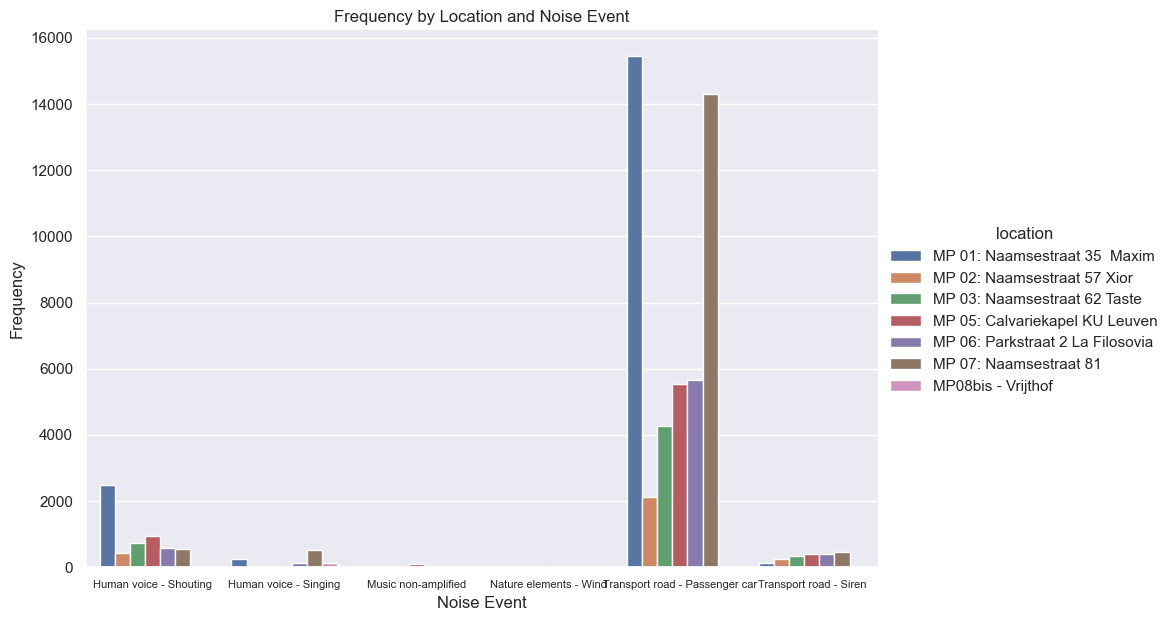

In [33]:
sns.set_theme(context='notebook', style='darkgrid')

grouped = file41.groupby(['location', 'noise_event'])['date'].count().reset_index(name='count')

g = sns.catplot(data=grouped, x='noise_event', y='count', hue='location',
    kind='bar', height=6, aspect=1.5)

g.set(xlabel='Noise Event', ylabel='Frequency', title='Frequency by Location and Noise Event')
plt.xticks(size = 8)
plt.tight_layout
plt.show()

- `Transport road - Passenger car` occurs most frequently during 7am - 10am (when people start going to work). Interestingly, we don't see another peak during rush hour.
- We see a peak of `Human voice - Shouting` during the midnight

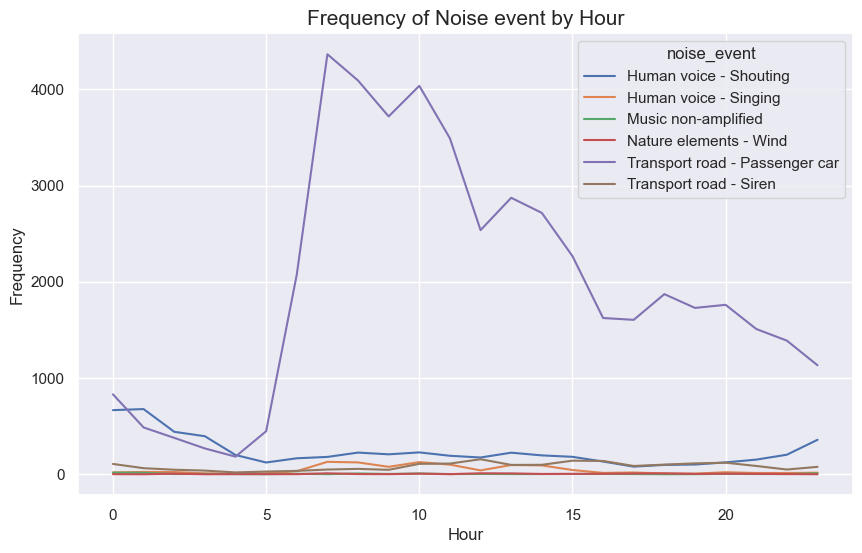

In [39]:
# group data by 'hour' and 'noise_event' and count occurrences
grouped = file41.groupby(['hour', 'noise_event'])['noise_event_certainty'].count().reset_index(name='count')

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='hour', y='count', hue='noise_event', data=grouped)
ax.set_xlabel("Hour")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Noise event by Hour", size=15)
plt.show()

- `March - April` seems like the noisiest period
- We see wide variation of noise event frequency during Spring
- We see an unusual gap in the end of `January`

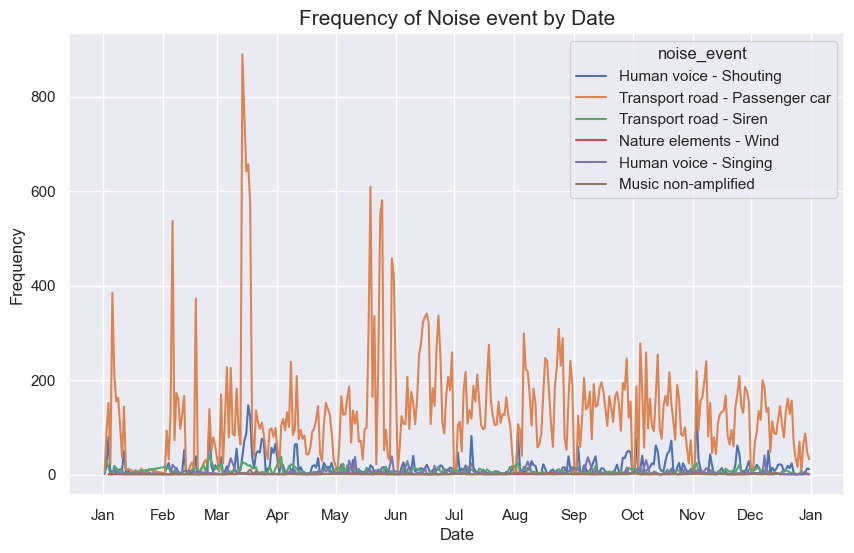

In [22]:
from matplotlib.dates import MonthLocator, DateFormatter

# group data by 'date' and 'noise_event' and count occurrences
grouped = file41.groupby(['date', 'noise_event'])['noise_event_certainty'].count().reset_index(name='count')

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='date', y='count', hue='noise_event', data=grouped)
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Noise event by Date", size=15)

# set xticks to show all months
months = MonthLocator()
date_format = DateFormatter('%b')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(date_format)

plt.show()


 - Thursday records the most noise events followed by Monday. But why?
 - Saturday and Sunday are the most quiet days, probably because students go home

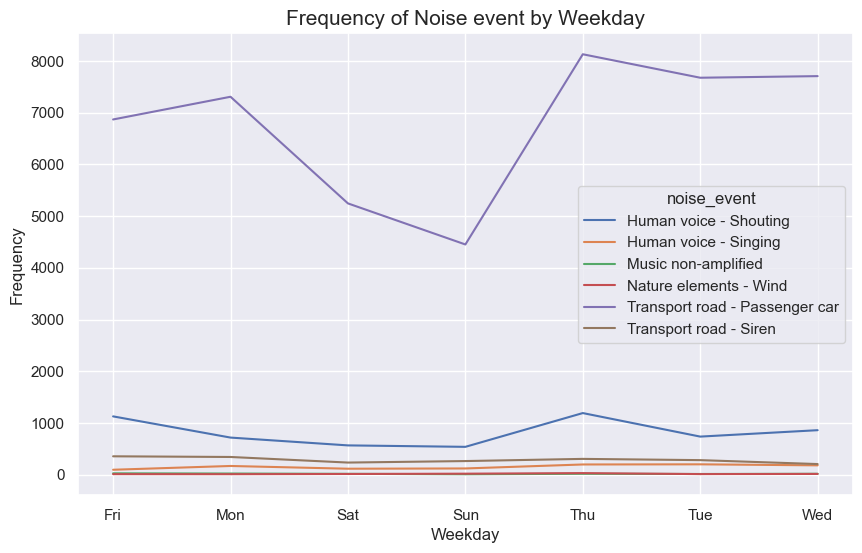

In [73]:
# plot 
grouped = file41.groupby(['weekday', 'noise_event'])['noise_event_certainty'].count().reset_index(name='count')

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='weekday', y='count', hue='noise_event', data=grouped)
ax.set_xlabel("Weekday")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Noise event by Weekday", size=15)
plt.show()

## File 40 - Noise level

In [77]:
file40.tail(5)

#object_id         description         result_timestamp  \
50315     303910  MP 04: His & Hears  31/12/2022 19:00:00.000   
50316     303910  MP 04: His & Hears  31/12/2022 20:00:00.000   
50317     303910  MP 04: His & Hears  31/12/2022 21:00:00.000   
50318     303910  MP 04: His & Hears  31/12/2022 22:00:00.000   
50319     303910  MP 04: His & Hears  31/12/2022 23:00:00.000   

       laf005_per_hour laf005_per_hour_unit  laf01_per_hour  \
50315             74.0                dB(A)            72.5   
50316             73.4                dB(A)            71.9   
50317             69.6                dB(A)            67.8   
50318             70.3                dB(A)            68.4   
50319             78.3                dB(A)            74.5   

      laf01_per_hour_unit  laf05_per_hour laf05_per_hour_unit  laf10_per_hour  \
50315               dB(A)            66.9               dB(A)            64.4   
50316               dB(A)            65.7               dB(A)            62.8   
50317               dB(A)            63.7               dB(A)            61.0   
50318               dB(A)            63.9               dB(A)            61.1   
50319               dB(A)            68.0               dB(A)            65.6   

       ... laf90_per_hour  laf90_per_hour_unit laf95_per_hour  \
50315  ...           48.2                dB(A)           47.1   
50316  ...           46.9                dB(A)           45.7   
50317  ...           45.5                dB(A)           44.5   
50318  ...           46.6                dB(A)           45.5   
50319  ...           51.6                dB(A)           50.0   

       laf95_per_hour_unit laf98_per_hour  laf98_per_hour_unit laf99_per_hour  \
50315                dB(A)           46.1                dB(A)           45.4   
50316                dB(A)           44.6                dB(A)           44.1   
50317                dB(A)           43.6                dB(A)           43.1   
50318                dB(A)           44.6                dB(A)           44.2   
50319                dB(A)           48.3                dB(A)           47.3   

       laf99_per_hour_unit laf995_per_hour  laf995_per_hour_unit  
50315                dB(A)            45.0                 dB(A)  
50316                dB(A)            43.8                 dB(A)  
50317                dB(A)            42.9                 dB(A)  
50318                dB(A)            43.9                 dB(A)  
50319                dB(A)            46.5                 dB(A)  

[5 rows x 27 columns]

In [91]:
# drop all _unit columns
cols_to_drop  = [col for col in file40.columns if col.endswith('unit')]
file40.drop(cols_to_drop, axis=1, inplace=True)

# rename columns
file40.rename(columns={'description':'location'}, inplace=True)


In [196]:
# Convert the 'result_timestamp' column to a datetime data type
file40['result_timestamp'] = pd.to_datetime(file40['result_timestamp'])
file40['date'] = file40['result_timestamp'].dt.date
file40['hour'] = file40['result_timestamp'].dt.hour
file40['weekday'] = file40['result_timestamp'].dt.strftime('%a')
file40.head(4)

#object_id                       location    result_timestamp  \
0     255439  MP 01: Naamsestraat 35  Maxim 2022-07-03 13:00:00   
1     255439  MP 01: Naamsestraat 35  Maxim 2022-07-03 14:00:00   
2     255439  MP 01: Naamsestraat 35  Maxim 2022-07-03 15:00:00   
3     255439  MP 01: Naamsestraat 35  Maxim 2022-07-03 16:00:00   

   laf005_per_hour  laf01_per_hour  laf05_per_hour  laf10_per_hour  \
0             65.4            64.0            60.5            58.0   
1             72.2            70.8            65.8            62.6   
2             74.5            72.2            66.0            63.5   
3             72.0            70.3            65.0            62.0   

   laf25_per_hour  laf50_per_hour  laf75_per_hour  laf90_per_hour  \
0            54.4            51.1            49.0            47.4   
1            57.2            51.9            48.1            45.2   
2            59.9            55.8            51.6            48.6   
3            57.2            52.9            48.6            45.4   

   laf95_per_hour  laf98_per_hour  laf99_per_hour  laf995_per_hour  \
0            46.4            45.2            44.8             44.0   
1            43.9            42.4            41.4             40.4   
2            47.3            45.8            45.2             44.5   
3            43.8            42.4            41.5             40.9   

         date  hour      time weekday  
0  2022-07-03    13  13:00:00     Sun  
1  2022-07-03    14  14:00:00     Sun  
2  2022-07-03    15  15:00:00     Sun  
3  2022-07-03    16  16:00:00     Sun

### By hour

- The noise level usually peaks around 8-9 AM which coincides with the time people start going to work
- The highest peaks are found during this hour in `MP 01`, this area also has highest frequency of Transportation sound. 
- If night sound should be below 40 dba for a good night sleep (according to WHO), then the area of `MP 03` and `MP 04` need to be regulated

In [158]:
laf_cols = [col for col in file40.columns if col.startswith("laf")]

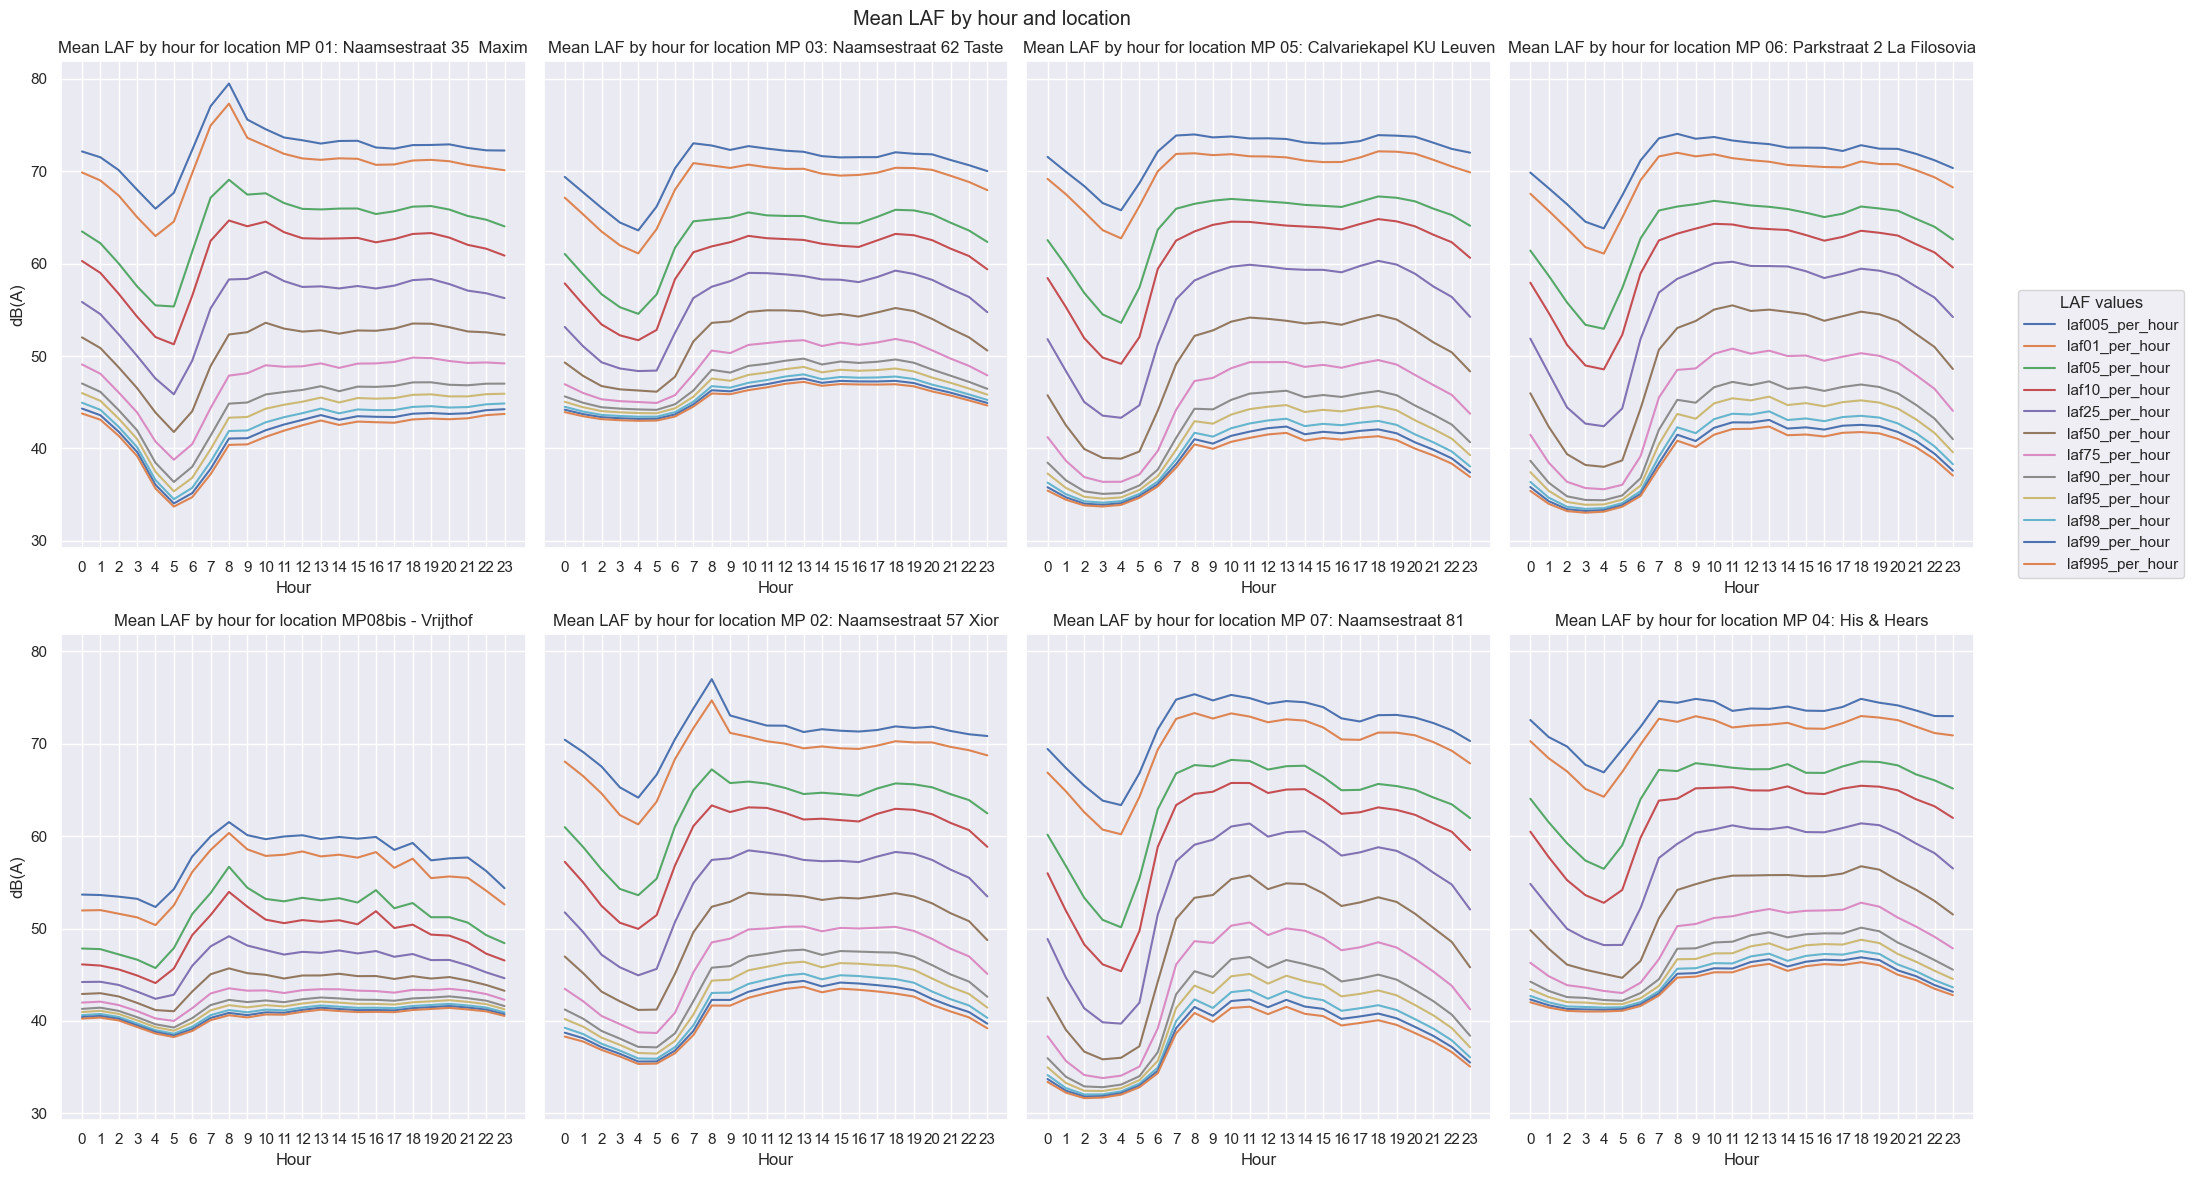

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

locations = file40['location'].unique()

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), sharey=True)

# loop over all location values and plot them in the grid
for i, loc in enumerate(locations):
    
    row = i // 4
    col = i % 4
    
    # filter the data for the current location and group by hour
    loc_data = file40[file40["location"] == loc]
    loc_hour = loc_data.groupby('hour')[laf_cols].mean()

    # create the line plot for each LAF column
    for var in laf_cols:
        sns.lineplot(data=loc_hour[var], label=None, ax=axs[row, col])

    axs[row, col].set_title(f"{loc}")
    axs[row, col].set_xlabel("Hour")
    axs[row, col].set_ylabel("dB(A)")
    axs[row, col].set_xticks(loc_hour.index)

legend = fig.legend(laf_cols, title="LAF values", loc='lower right', bbox_to_anchor=(1.1, 0.5))

# add a title to the whole plot
fig.suptitle("Mean LAF by hour and location")

plt.tight_layout()
plt.show()


The entries that have maximum `laf005_per_hour` > 100 occures primarily on `July 6` and `July 25`. What kind of events happened on these days?

In [199]:
file40[file40.laf005_per_hour > 100]

#object_id                       location    result_timestamp  \
2203      255439  MP 01: Naamsestraat 35  Maxim 2022-07-06 09:00:00   
2204      255439  MP 01: Naamsestraat 35  Maxim 2022-07-06 10:00:00   
2205      255439  MP 01: Naamsestraat 35  Maxim 2022-07-06 11:00:00   
2206      255439  MP 01: Naamsestraat 35  Maxim 2022-07-06 12:00:00   
10438     255441   MP 03: Naamsestraat 62 Taste 2022-07-25 16:00:00   
10439     255441   MP 03: Naamsestraat 62 Taste 2022-07-25 17:00:00   
10440     255441   MP 03: Naamsestraat 62 Taste 2022-07-25 18:00:00   
10441     255441   MP 03: Naamsestraat 62 Taste 2022-07-25 19:00:00   
11128     255441   MP 03: Naamsestraat 62 Taste 2022-08-23 10:00:00   
46469     255444         MP 07: Naamsestraat 81 2022-08-17 14:00:00   

       laf005_per_hour  laf01_per_hour  laf05_per_hour  laf10_per_hour  \
2203             102.5           101.7            99.9            98.9   
2204             102.8           102.2           100.0            98.8   
2205             103.2           102.6           100.7            99.7   
2206             101.7           101.4           100.0            98.8   
10438            109.9           109.3            74.2            63.4   
10439            110.1           110.0           108.8           106.9   
10440            110.0           109.9           109.2           108.6   
10441            109.9           109.8           108.7           108.1   
11128            109.6           108.2            69.8            66.0   
46469            100.5            98.8            80.5            76.2   

       laf25_per_hour  laf50_per_hour  laf75_per_hour  laf90_per_hour  \
2203             96.9            90.2            81.6            60.2   
2204             96.3            85.2            65.3            60.4   
2205             97.8            93.9            62.0            58.4   
2206             77.0            66.4            61.2            57.9   
10438            57.2            52.5            49.2            47.7   
10439            60.6            54.8            50.6            48.5   
10440           106.1            58.4            52.2            48.9   
10441            63.6            54.3            49.3            47.2   
11128            63.0            57.3            52.7            49.9   
46469            72.6            62.6            56.0            52.2   

       laf95_per_hour  laf98_per_hour  laf99_per_hour  laf995_per_hour  \
2203             58.6            57.8            57.5             57.3   
2204             59.4            58.7            58.4             58.3   
2205             57.7            57.3            57.2             57.0   
2206             57.5            57.2            57.1             56.9   
10438            47.0            46.4            46.1             45.8   
10439            47.6            46.8            46.4             46.1   
10440            47.7            46.8            46.3             45.9   
10441            46.5            45.9            45.6             45.3   
11128            48.6            47.7            47.0             46.6   
46469            50.0            47.5            46.2             45.1   

             date  hour      time weekday  
2203   2022-07-06     9  09:00:00     Wed  
2204   2022-07-06    10  10:00:00     Wed  
2205   2022-07-06    11  11:00:00     Wed  
2206   2022-07-06    12  12:00:00     Wed  
10438  2022-07-25    16  16:00:00     Mon  
10439  2022-07-25    17  17:00:00     Mon  
10440  2022-07-25    18  18:00:00     Mon  
10441  2022-07-25    19  19:00:00     Mon  
11128  2022-08-23    10  10:00:00     Tue  
46469  2022-08-17    14  14:00:00     Wed

### By date

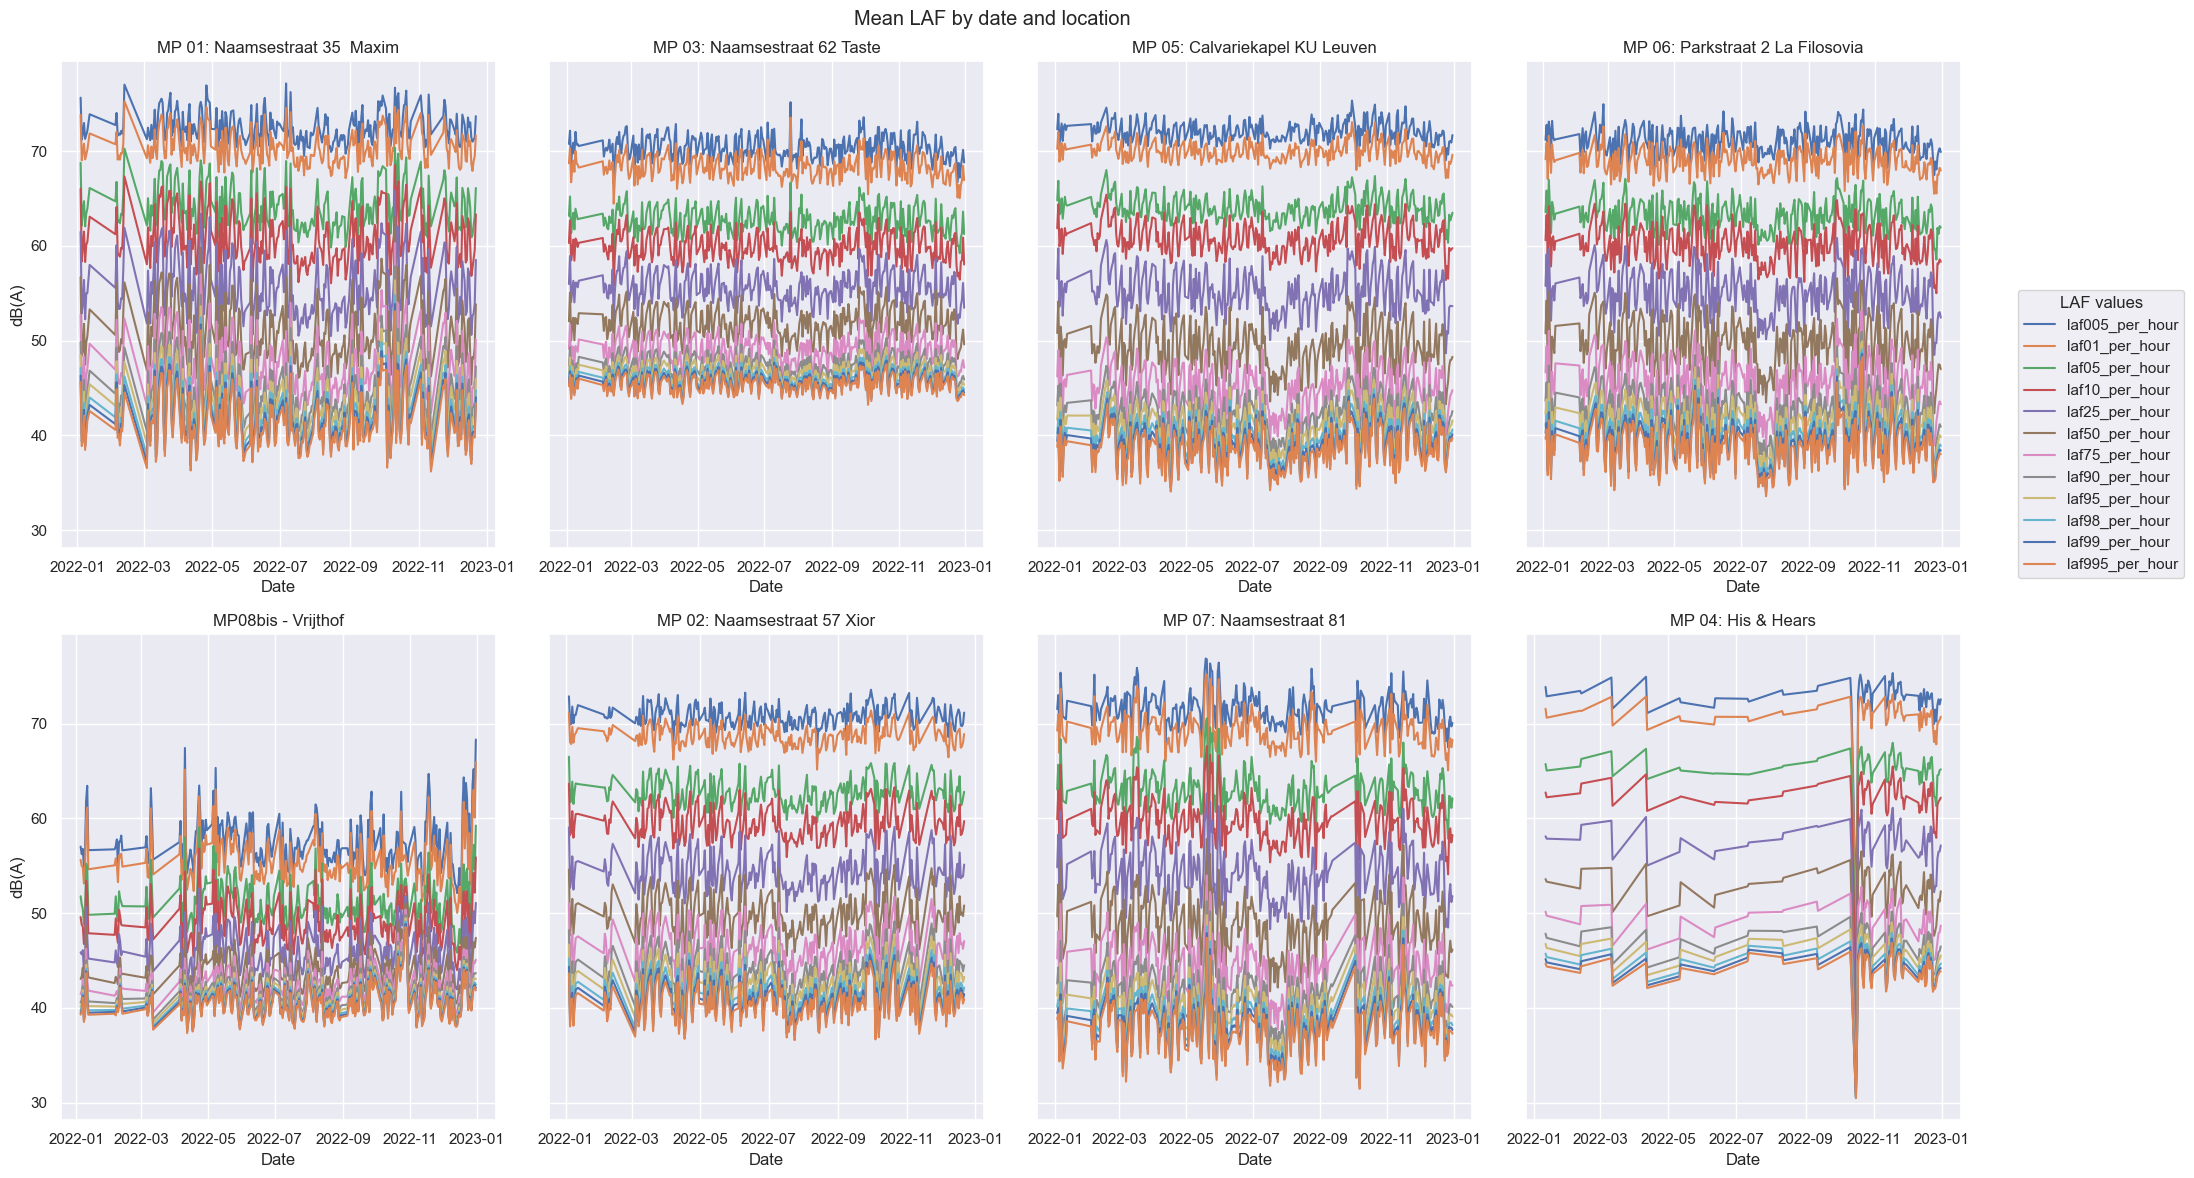

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

locations = file40['location'].unique()

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), sharey=True)

# loop over all location values and plot them in the grid
for i, loc in enumerate(locations):
    
    row = i // 4
    col = i % 4
    
    # filter the data for the current location and group by hour
    loc_data = file40[file40["location"] == loc]
    loc_date = loc_data.groupby('date')[laf_cols].mean()

    # create the line plot for each LAF column
    for var in laf_cols:
        sns.lineplot(data=loc_date[var], label=None, ax=axs[row, col])

    axs[row, col].set_title(f"{loc}")
    axs[row, col].set_xlabel("Date")
    axs[row, col].set_ylabel("dB(A)")

legend = fig.legend(laf_cols, title="LAF values", loc='lower right', bbox_to_anchor=(1.1, 0.5))

# add a title to the whole plot
fig.suptitle("Mean LAF by date and location")

plt.tight_layout()
plt.show()


 You usually see a peak during `July - September` in terms of max LAF values

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/

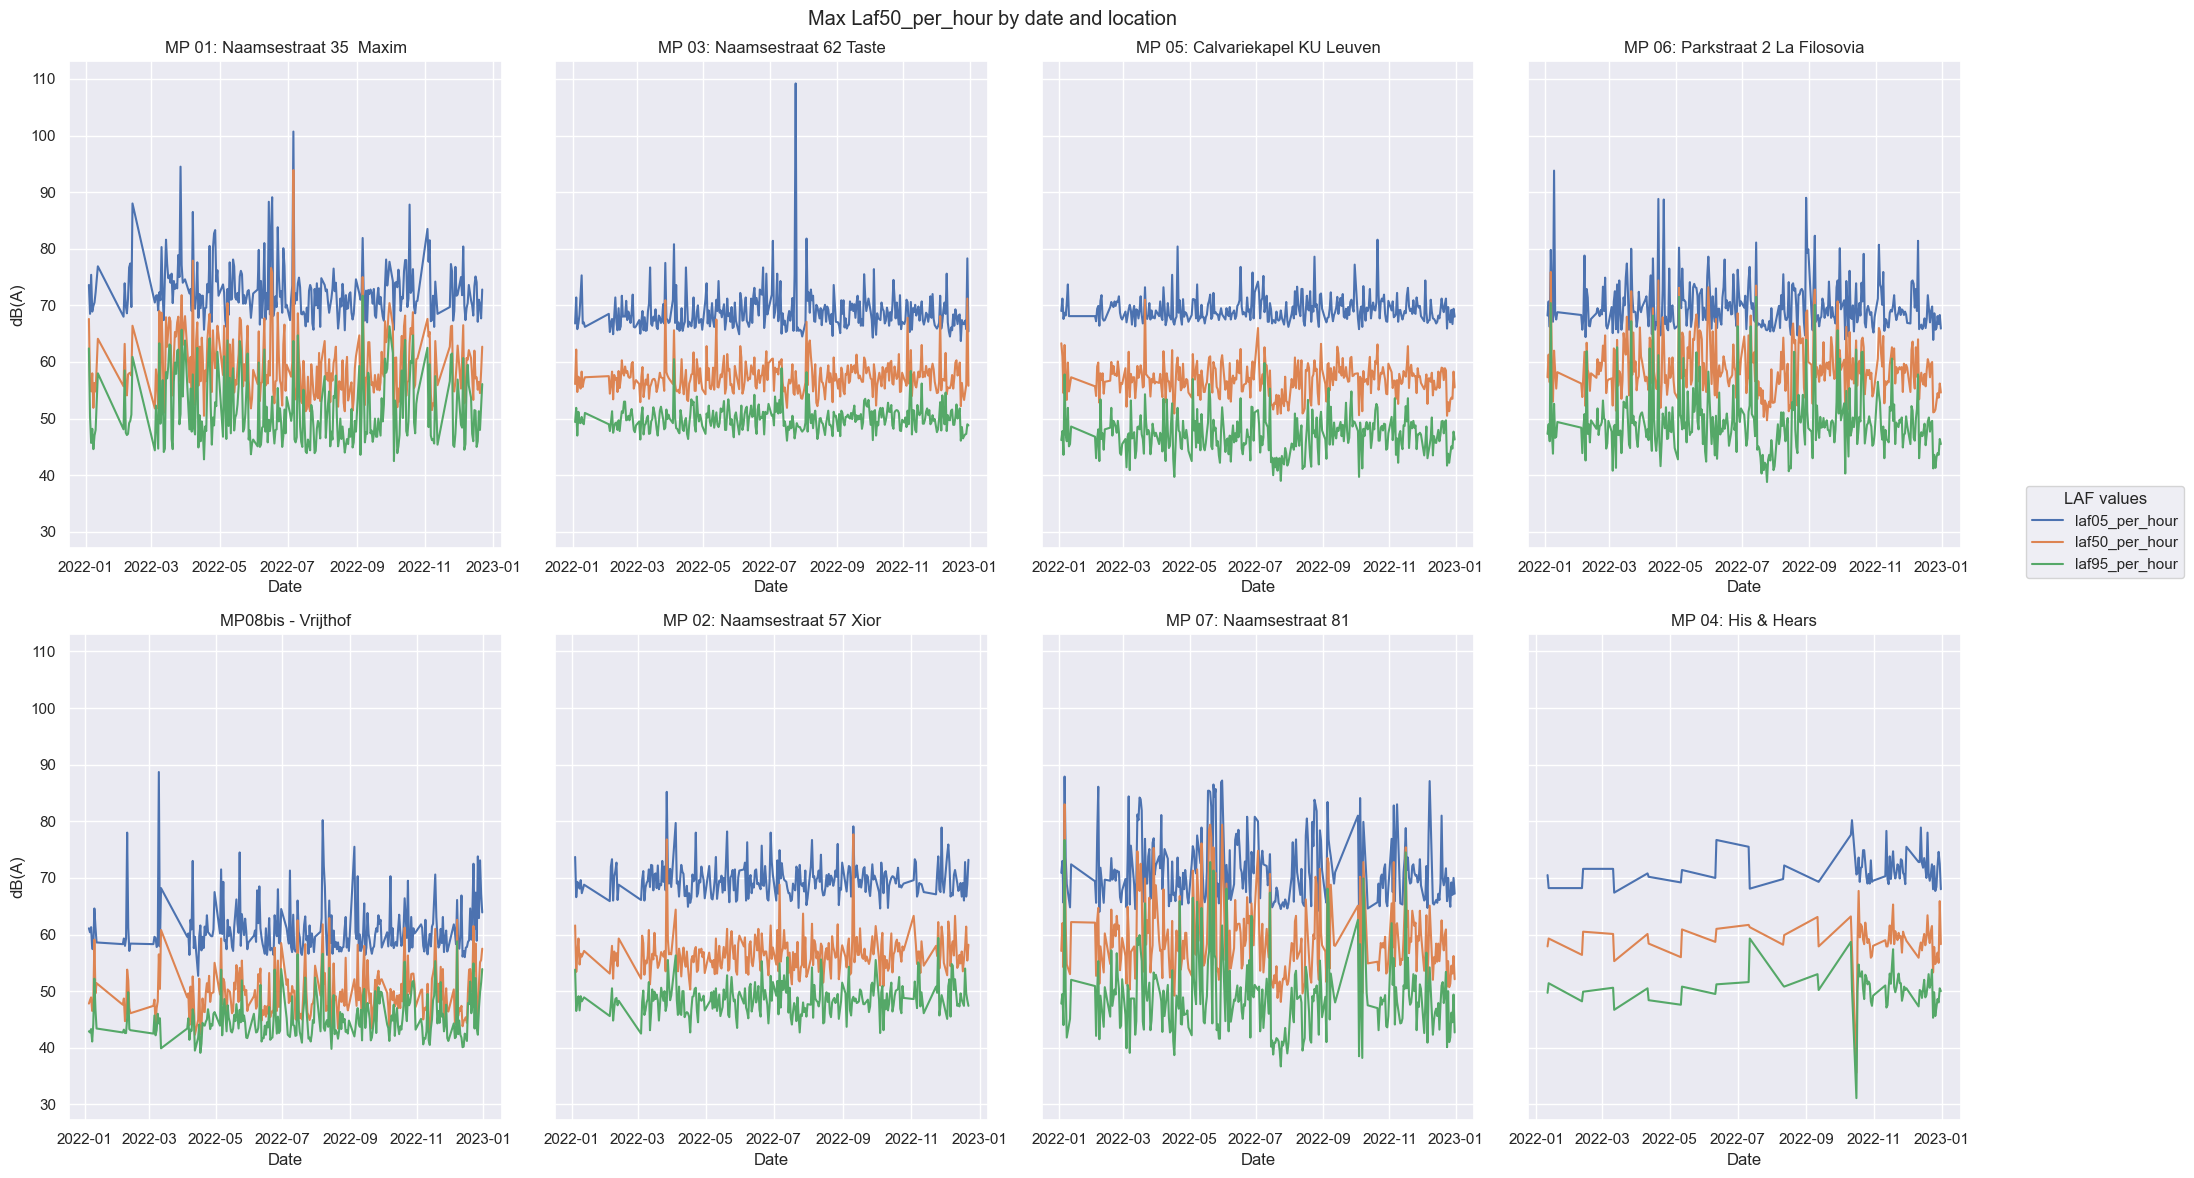

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

locations = file40['location'].unique()

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), sharey=True)

# loop over all location values and plot them in the grid
for i, loc in enumerate(locations):
    
    row = i // 4
    col = i % 4
    
    # filter the data for the current location and group by hour
    loc_data = file40[file40["location"] == loc]
    loc_date = loc_data.groupby('date')["laf05_per_hour", "laf50_per_hour", "laf95_per_hour"].max()

    # create the line plot for each LAF column
    for var in ["laf05_per_hour", "laf50_per_hour", "laf95_per_hour"]:
        sns.lineplot(data=loc_date[var], label=None, ax=axs[row, col])

    axs[row, col].set_title(f"{loc}")
    axs[row, col].set_xlabel("Date")
    axs[row, col].set_ylabel("dB(A)")
    
legend = fig.legend(["laf05_per_hour", "laf50_per_hour", "laf95_per_hour"], title="LAF values", loc='lower right', bbox_to_anchor=(1.1, 0.5))

# add a title to the whole plot
fig.suptitle("Max Laf values by date and location")

plt.tight_layout()
plt.show()


### By weekday

The mean LAF values usually peak on `Thu` and `Fri`. This coincides with our finding with File40 as we found transporation sound to occur most frequently on `Thu`

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/opt/anaconda3/

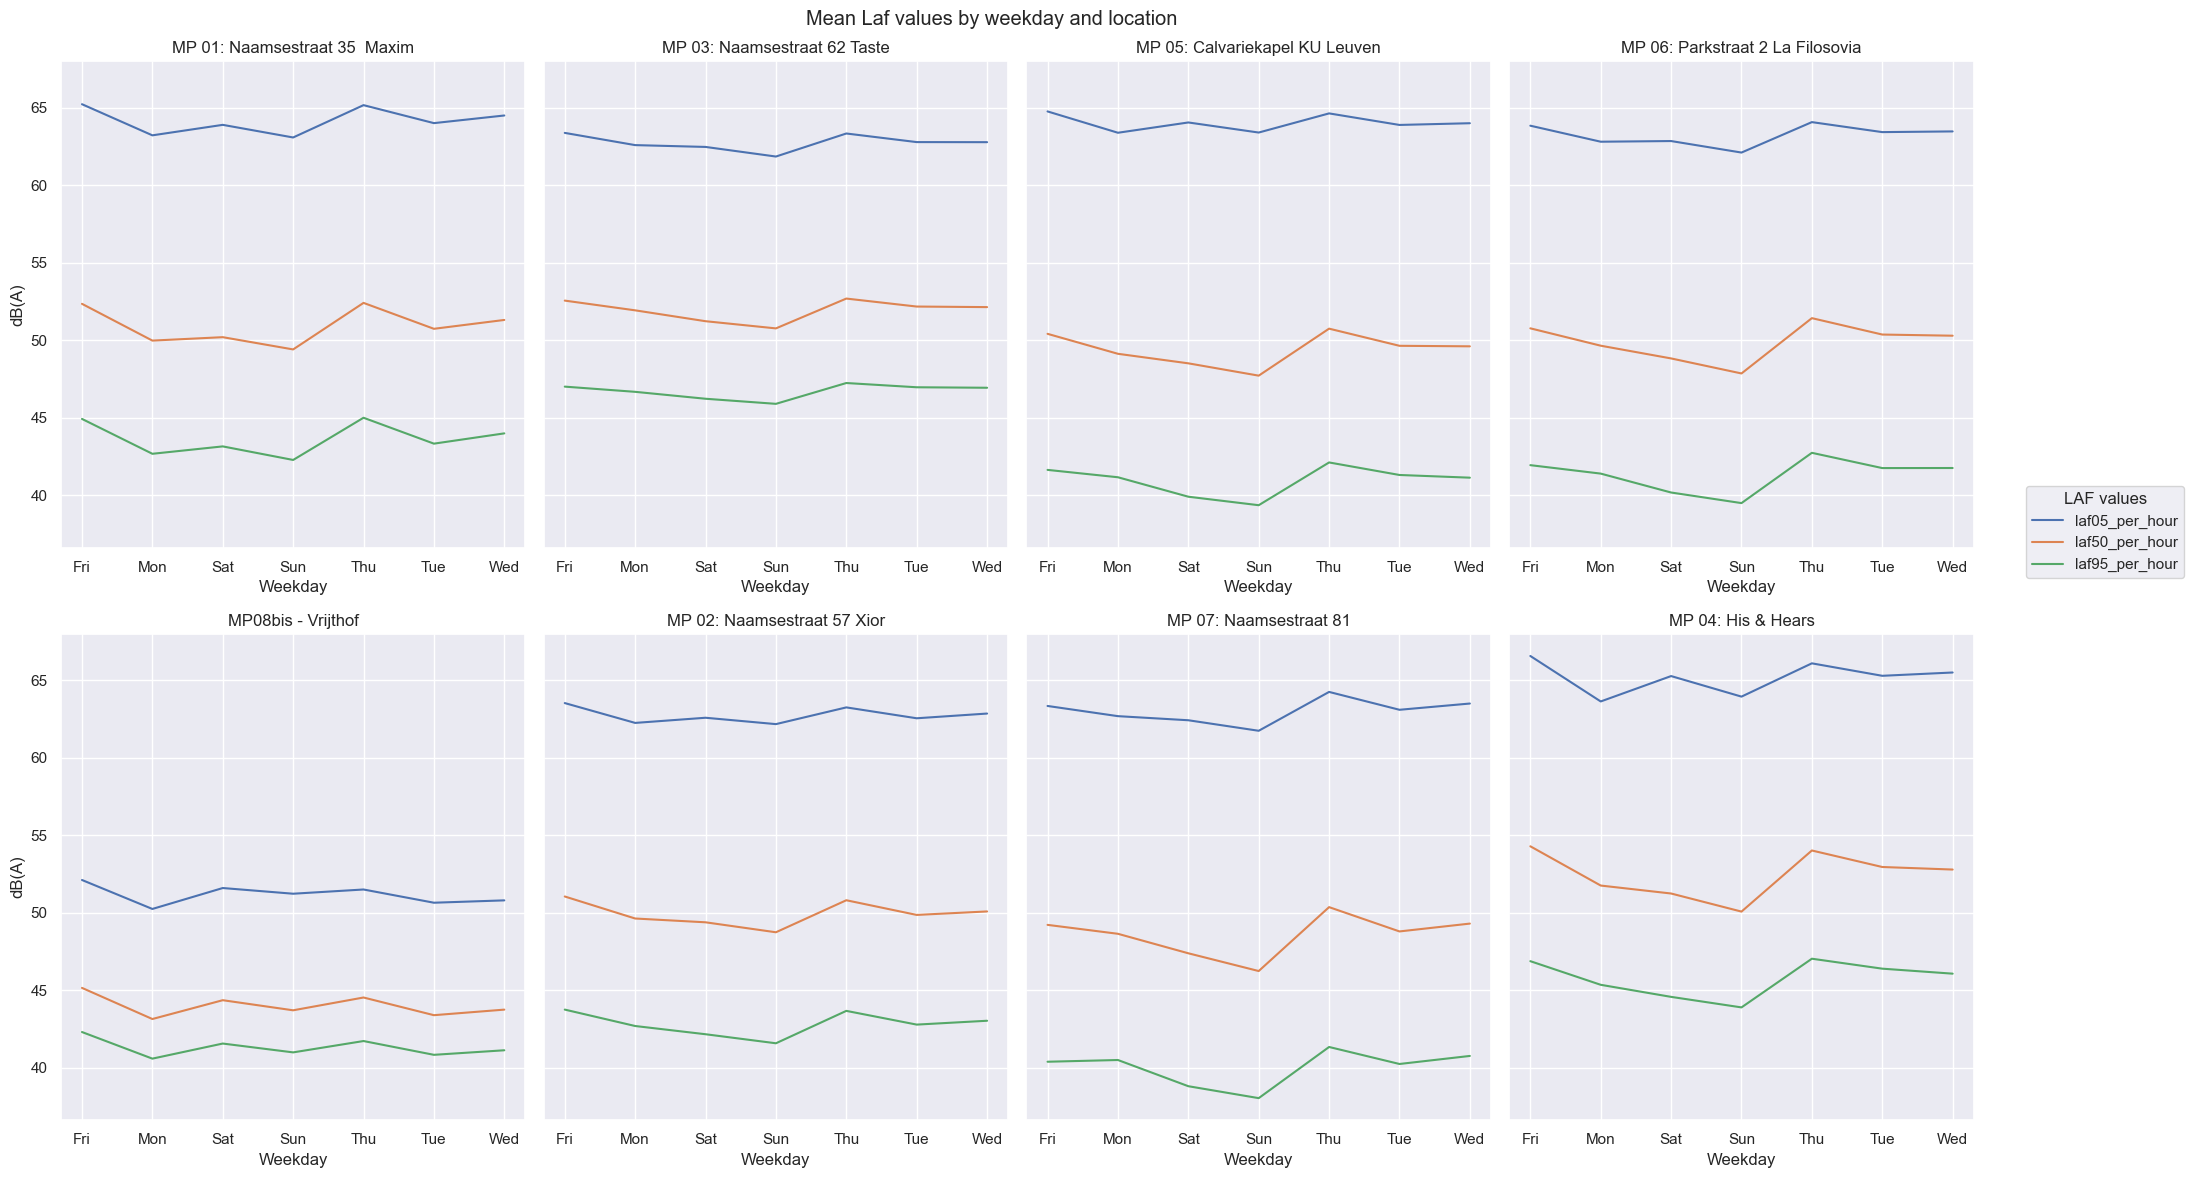

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

locations = file40['location'].unique()

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), sharey=True)

# loop over all location values and plot them in the grid
for i, loc in enumerate(locations):
    
    row = i // 4
    col = i % 4
    
    # filter the data for the current location and group by hour
    loc_data = file40[file40["location"] == loc]
    loc_date = loc_data.groupby('weekday')["laf05_per_hour", "laf50_per_hour", "laf95_per_hour"].mean()

    # create the line plot for each LAF column
    for var in ["laf05_per_hour", "laf50_per_hour", "laf95_per_hour"]:
        sns.lineplot(data=loc_date[var], label=None, ax=axs[row, col])

    axs[row, col].set_title(f"{loc}")
    axs[row, col].set_xlabel("Weekday")
    axs[row, col].set_ylabel("dB(A)")
    
legend = fig.legend(["laf05_per_hour", "laf50_per_hour", "laf95_per_hour"], title="LAF values", loc='lower right', bbox_to_anchor=(1.1, 0.5))

# add a title to the whole plot
fig.suptitle("Mean Laf values by weekday and location")

plt.tight_layout()
plt.show()


In [272]:
# Resample noise level by day in all locations

noise_level_daily_mean = file40.copy()
noise_level_daily_mean.rename(columns={'result_timestamp':'DATEUTC'}, inplace=True)
noise_level_daily_mean.set_index("DATEUTC", inplace=True)
noise_level_daily_mean = noise_level_daily_mean[laf_cols].resample("D").mean()
noise_level_daily_mean.head(3)

laf005_per_hour  laf01_per_hour  laf05_per_hour  laf10_per_hour  \
DATEUTC                                                                       
2022-01-03        71.458333       69.350000       63.656250       60.671875   
2022-01-04        73.411806       71.519444       66.485417       63.827778   
2022-01-05        67.908333       66.041667       60.416071       57.258333   

            laf25_per_hour  laf50_per_hour  laf75_per_hour  laf90_per_hour  \
DATEUTC                                                                      
2022-01-03       55.784375       50.817708       46.801042       44.162500   
2022-01-04       59.436806       54.633333       50.317361       47.088889   
2022-01-05       51.982738       46.960119       43.257738       40.923214   

            laf95_per_hour  laf98_per_hour  laf99_per_hour  laf995_per_hour  
DATEUTC                                                                      
2022-01-03       42.953125       41.790625       41.145833        40.612500  
2022-01-04       45.522222       44.061806       43.252778        42.615972  
2022-01-05       39.851190       38.855357       38.330357        37.913095

### All locations

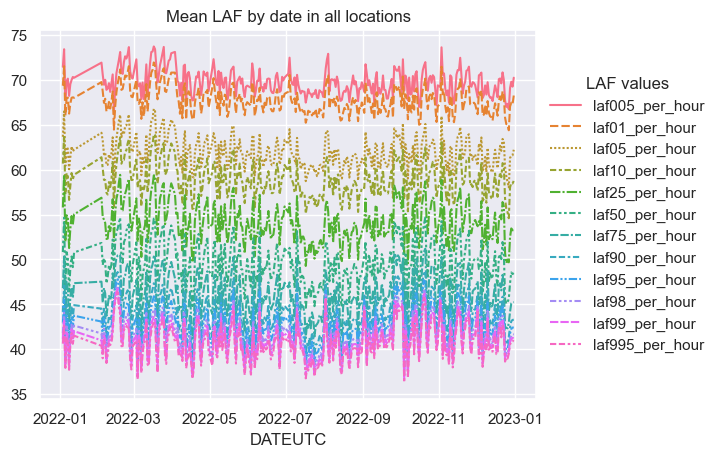

In [235]:
sns.lineplot(data=noise_level_daily_mean)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='LAF values', frameon=False)
plt.title("Mean LAF by date in all locations")
plt.show()

## File 42

In [191]:
file42.head(5)

#object_id                       description         result_timestamp  \
0     255443  MP 06: Parkstraat 2 La Filosovia  01/01/2022 00:00:00.419   
1     255443  MP 06: Parkstraat 2 La Filosovia  01/01/2022 00:00:01.419   
2     255443  MP 06: Parkstraat 2 La Filosovia  01/01/2022 00:00:02.419   
3     255443  MP 06: Parkstraat 2 La Filosovia  01/01/2022 00:00:03.419   
4     255443  MP 06: Parkstraat 2 La Filosovia  01/01/2022 00:00:04.419   

   lamax lamax_unit  laeq laeq_unit   lceq lceq_unit  lcpeak lcpeak_unit  
0   73.8      dB(A)  70.2     dB(A)  70.51     dB(C)   84.59       dB(C)  
1   72.6      dB(A)  69.9     dB(A)  70.89     dB(C)   84.33       dB(C)  
2   71.9      dB(A)  70.1     dB(A)  70.82     dB(C)   81.49       dB(C)  
3   70.0      dB(A)  64.9     dB(A)  67.19     dB(C)   79.89       dB(C)  
4   63.0      dB(A)  60.9     dB(A)  65.11     dB(C)   79.84       dB(C)

In [284]:
# Convert the 'result_timestamp' column to a datetime data type
file42['result_timestamp'] = pd.to_datetime(file40['result_timestamp'])
file42['date'] = file40['result_timestamp'].dt.date
file42['hour'] = file40['result_timestamp'].dt.hour
file42['weekday'] = file40['result_timestamp'].dt.strftime('%a')
file42.head(4)

#object_id                       description    result_timestamp  lamax  \
0     255443  MP 06: Parkstraat 2 La Filosovia 2022-07-03 13:00:00   73.8   
1     255443  MP 06: Parkstraat 2 La Filosovia 2022-07-03 14:00:00   72.6   
2     255443  MP 06: Parkstraat 2 La Filosovia 2022-07-03 15:00:00   71.9   
3     255443  MP 06: Parkstraat 2 La Filosovia 2022-07-03 16:00:00   70.0   

  lamax_unit  laeq laeq_unit   lceq lceq_unit  lcpeak lcpeak_unit        date  \
0      dB(A)  70.2     dB(A)  70.51     dB(C)   84.59       dB(C)  2022-07-03   
1      dB(A)  69.9     dB(A)  70.89     dB(C)   84.33       dB(C)  2022-07-03   
2      dB(A)  70.1     dB(A)  70.82     dB(C)   81.49       dB(C)  2022-07-03   
3      dB(A)  64.9     dB(A)  67.19     dB(C)   79.89       dB(C)  2022-07-03   

   hour weekday  
0  13.0     Sun  
1  14.0     Sun  
2  15.0     Sun  
3  16.0     Sun

In [287]:
# drop all _unit columns
cols_to_drop  = [col for col in file42.columns if col.endswith('unit')]
file42.drop(cols_to_drop, axis=1, inplace=True)

# rename columns
file42.rename(columns={'description':'location'}, inplace=True)

In [295]:
file42.isna().sum()

#object_id                 0
location                   0
result_timestamp    10614770
lamax                      3
laeq                       3
lceq                      12
lcpeak                    12
date                10614770
hour                10614770
weekday             10614770
dtype: int64

Most entries do not have timestamp

## Meteo data

In [193]:
# show max columns
pd.set_option('display.max_columns', None)

In [198]:
meteo.head(5)

DATEUTC      ID  LC_HUMIDITY  LC_DWPTEMP  LC_n  LC_RAD  \
0  2022-10-01 00:10:00  LC-002         93.0        9.88  38.0     0.0   
1  2022-10-01 00:20:00  LC-002         93.0        9.83  37.0     0.0   
2  2022-10-01 00:30:00  LC-002         93.0        9.78  38.0     0.0   
3  2022-10-01 00:40:00  LC-002         94.0        9.98  37.0     0.0   
4  2022-10-01 00:50:00  LC-002         94.0       10.11  38.0     0.0   

   LC_RAININ  LC_DAILYRAIN  LC_WINDDIR  LC_WINDSPEED        Date  Year  Month  \
0      0.005         0.007       167.0          2.07  2022-10-01  2022     10   
1      0.003         0.007       180.0          2.17  2022-10-01  2022     10   
2      0.002         0.007      -176.0          1.65  2022-10-01  2022     10   
3      0.000         0.007      -157.0          1.49  2022-10-01  2022     10   
4      0.002         0.008      -166.0          1.71  2022-10-01  2022     10   

   Day  Hour  Minute  LC_RAD60  LC_TEMP_QCL0  LC_TEMP_QCL1  LC_TEMP_QCL2  \
0    1     0      10       0.0         11.00         11.00       10.9415   
1    1     0      20       0.0         10.95         10.95       10.8915   
2    1     0      30       0.0         10.89         10.89       10.8315   
3    1     0      40       0.0         10.92         10.92       10.8615   
4    1     0      50       0.0         11.00         11.00       10.9415   

   LC_TEMP_QCL3  
0     11.057841  
1     11.005883  
2     10.890201  
3     10.958041  
4     11.041826

In [202]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546880 entries, 0 to 5546879
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DATEUTC       object 
 1   ID            object 
 2   LC_HUMIDITY   float64
 3   LC_DWPTEMP    float64
 4   LC_n          float64
 5   LC_RAD        float64
 6   LC_RAININ     float64
 7   LC_DAILYRAIN  float64
 8   LC_WINDDIR    float64
 9   LC_WINDSPEED  float64
 10  Date          object 
 11  Year          int64  
 12  Month         int64  
 13  Day           int64  
 14  Hour          int64  
 15  Minute        int64  
 16  LC_RAD60      float64
 17  LC_TEMP_QCL0  float64
 18  LC_TEMP_QCL1  float64
 19  LC_TEMP_QCL2  float64
 20  LC_TEMP_QCL3  float64
dtypes: float64(13), int64(5), object(3)
memory usage: 888.7+ MB


In [209]:
# convert to datetime format
meteo['DATEUTC'] = pd.to_datetime(meteo['DATEUTC'])

# set time as index
meteo.set_index('DATEUTC', inplace=True)

In [210]:
# resample the data by day and take the mean
lc_cols = [col for col in meteo.columns if col.startswith("LC")]
meteo_daily_mean = meteo[lc_cols].resample('D').mean()
meteo_daily_mean.reset_index(inplace=True)
meteo_daily_mean.head(3)

DATEUTC  LC_HUMIDITY  LC_DWPTEMP       LC_n     LC_RAD  LC_RAININ  \
0 2022-01-01    86.557205   10.257703  36.346609  21.264531   0.000002   
1 2022-01-02    83.512460    9.379296  36.056435  14.140794   0.000658   
2 2022-01-03    89.579036    8.004425  35.882086   5.529369   0.000750   

   LC_DAILYRAIN  LC_WINDDIR  LC_WINDSPEED   LC_RAD60  LC_TEMP_QCL0  \
0      0.000029   -6.567639      0.322477  21.396634     12.447359   
1      0.003468  -28.866315      0.721487  14.099483     12.112883   
2      0.006831  -35.256016      0.663436   5.517430      9.646861   

   LC_TEMP_QCL1  LC_TEMP_QCL2  LC_TEMP_QCL3  
0     12.464281     12.450807     12.424740  
1     12.115685     12.102359     12.086891  
2      9.648249      9.635166      9.683051

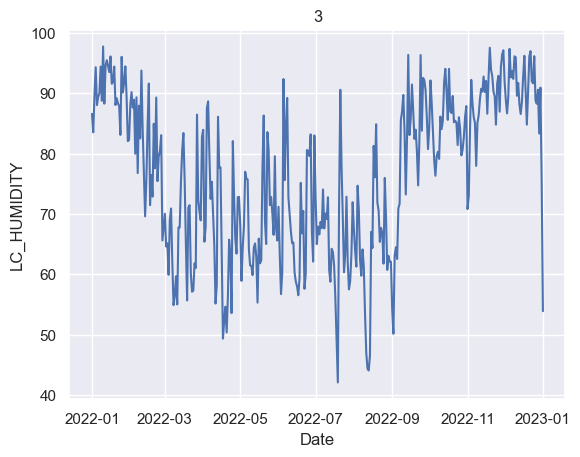

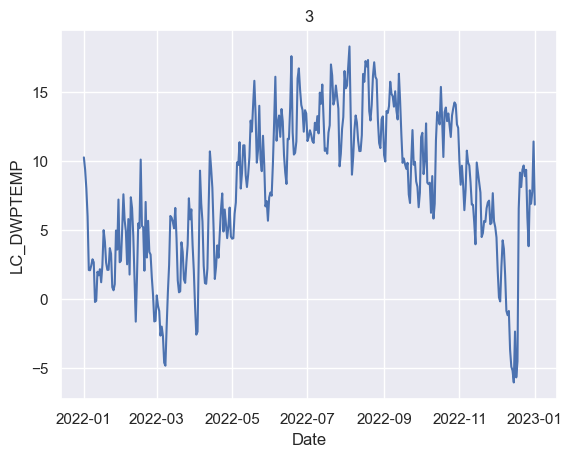

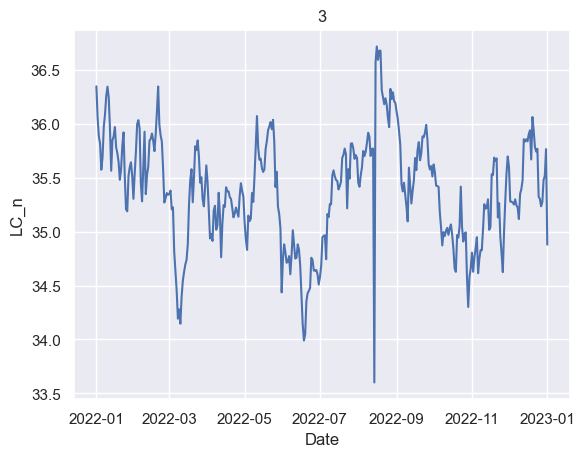

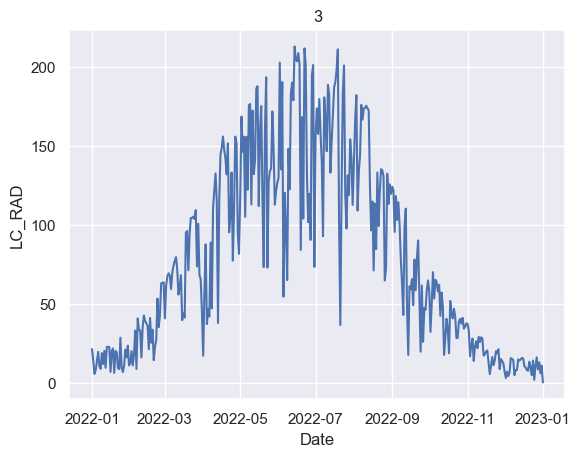

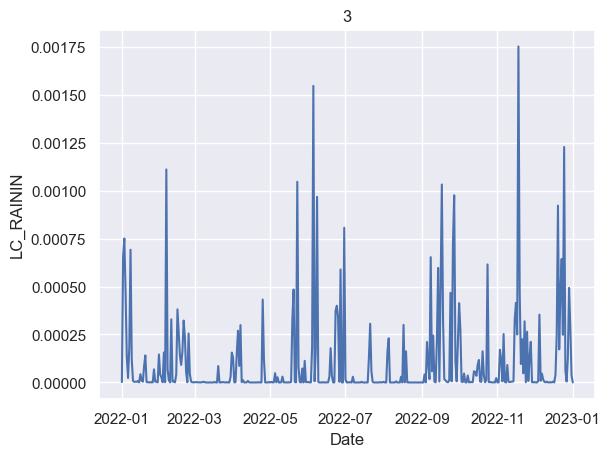

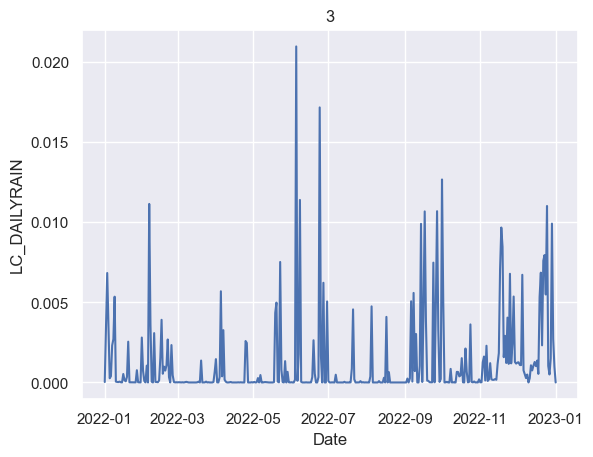

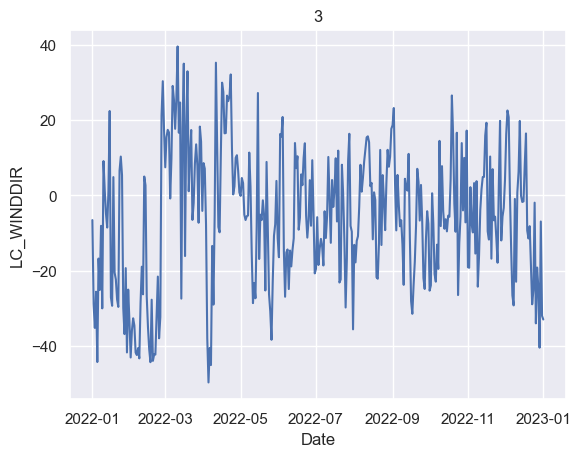

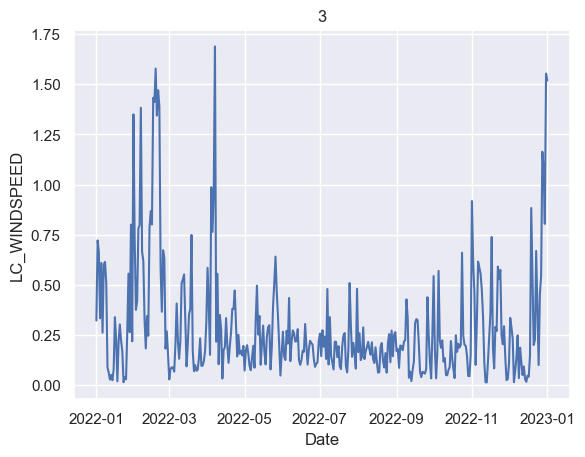

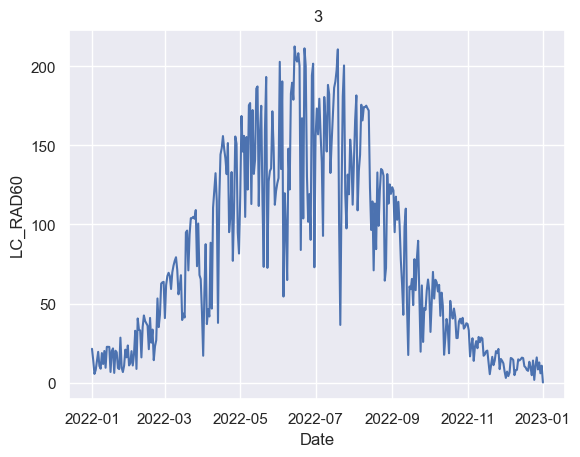

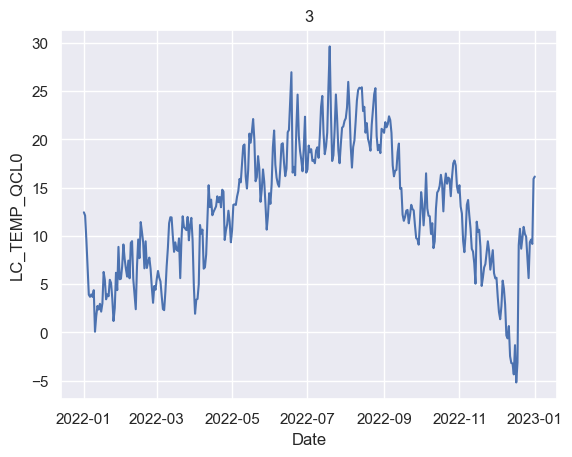

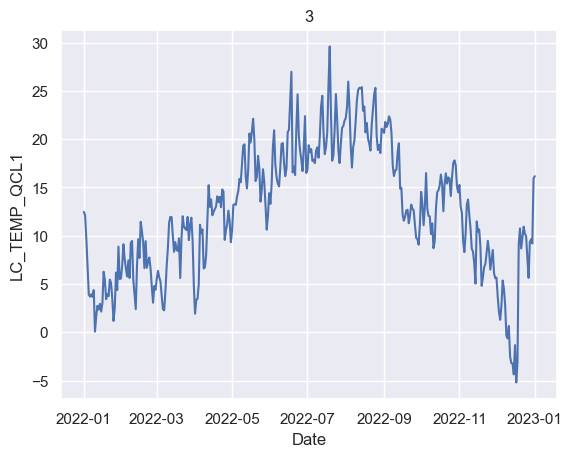

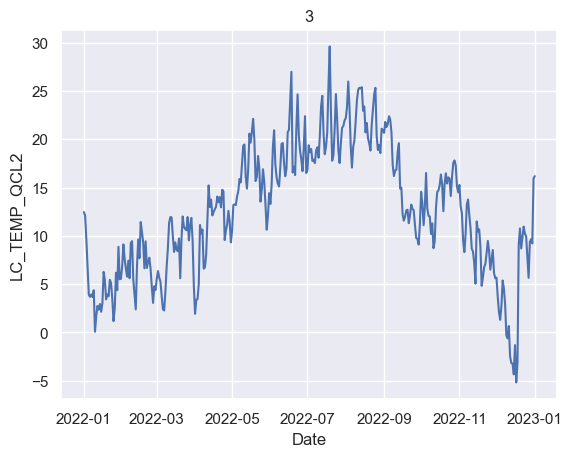

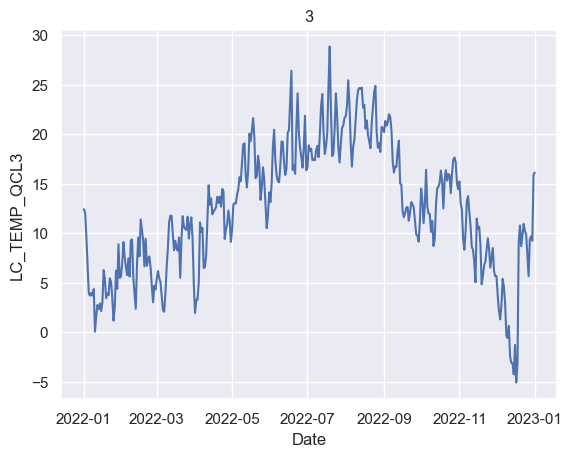

In [220]:
for var in lc_cols:
    plt.figure()
    sns.lineplot(data=meteo_daily_mean, x="DATEUTC", y=meteo_daily_mean[var])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel(var)

### Correlation between daily meteorological data and LAF

In [273]:
# Merge meteo daily data with mean daily noise level data

noise_level_daily_mean.reset_index(inplace=True)
meteo_noise_daily_mean = meteo_daily_mean.merge(noise_level_daily_mean[['DATEUTC', 'laf50_per_hour']], on=['DATEUTC'])
meteo_noise_daily_mean.head(3)

DATEUTC  LC_HUMIDITY  LC_DWPTEMP       LC_n     LC_RAD  LC_RAININ  \
0 2022-01-03    89.579036    8.004425  35.882086   5.529369   0.000750   
1 2022-01-04    94.288450    5.983424  35.816041   7.944379   0.000469   
2 2022-01-05    88.026102    2.078484  35.573298  13.893690   0.000131   

   LC_DAILYRAIN  LC_WINDDIR  LC_WINDSPEED   LC_RAD60  LC_TEMP_QCL0  \
0      0.006831  -35.256016      0.663436   5.517430      9.646861   
1      0.003571  -25.637291      0.333304   7.962571      6.830167   
2      0.000262  -44.342911      0.609569  13.890103      3.903085   

   LC_TEMP_QCL1  LC_TEMP_QCL2  LC_TEMP_QCL3  laf50_per_hour  
0      9.648249      9.635166      9.683051       50.817708  
1      6.828260      6.816515      6.837235       54.633333  
2      3.900556      3.890475      3.915760       46.960119

`laf50_per_hour` by date displays a week correlation with weather conditions

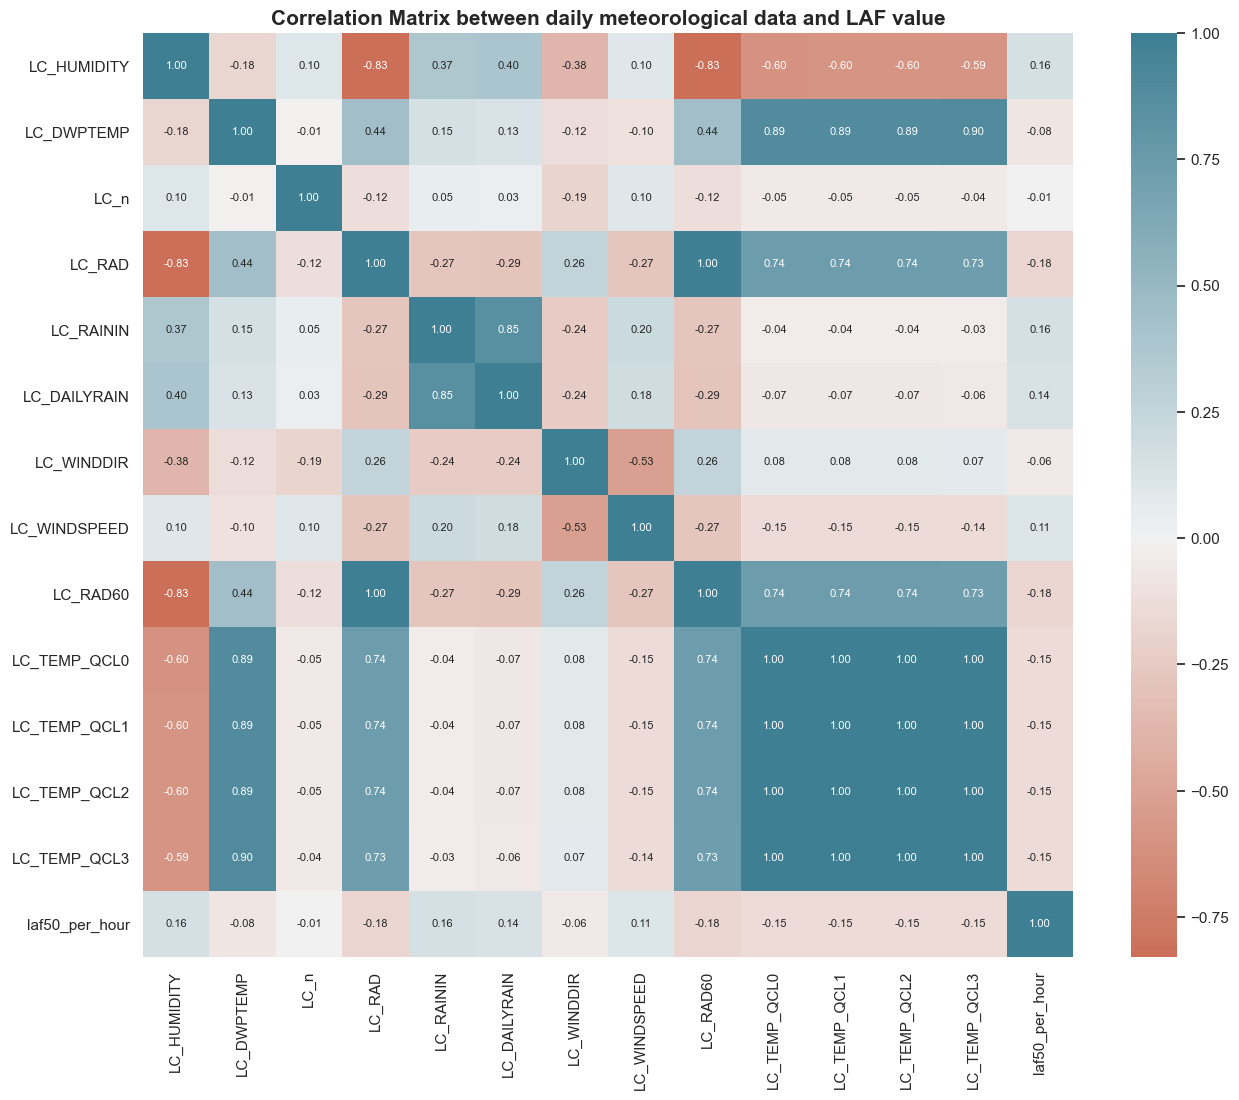

In [279]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=meteo_noise_daily_mean.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, center=0, annot_kws={"size": 8})
plt.title("Correlation Matrix between daily meteorological data and LAF value",size=15, weight='bold')
plt.show()

### Correlation between hourly meteorological data and LAF

In [241]:
# resample the data by hour and take the mean
lc_cols = [col for col in meteo.columns if col.startswith("LC")]
meteo_hourly_mean = meteo[lc_cols].resample('H').mean()
meteo_hourly_mean.reset_index(inplace=True)
meteo_hourly_mean.head(3)

DATEUTC  LC_HUMIDITY  LC_DWPTEMP       LC_n    LC_RAD  \
0 2022-01-01 00:00:00    90.367865   11.501860  36.353066  0.082452   
1 2022-01-01 01:00:00    89.504394   11.350650  36.316344  0.093146   
2 2022-01-01 02:00:00    89.311072   11.132355  36.525483  0.094903   

   LC_RAININ  LC_DAILYRAIN  LC_WINDDIR  LC_WINDSPEED  LC_RAD60  LC_TEMP_QCL0  \
0   0.000000           0.0  -17.124736      0.153679  0.082452     13.043446   
1   0.000007           0.0  -17.166960      0.229297  0.083624     13.032021   
2   0.000009           0.0  -14.453427      0.224025  0.092496     12.837575   

   LC_TEMP_QCL1  LC_TEMP_QCL2  LC_TEMP_QCL3  
0     13.054252     13.039616     13.013112  
1     13.042771     13.028941     13.022762  
2     12.850302     12.836191     12.828541

In [280]:
file40_copy = file40.copy()
file40_copy.rename(columns={'result_timestamp':'DATEUTC'}, inplace=True)
meteo_noise_hourly_mean = meteo_hourly_mean.merge(file40_copy[['DATEUTC', "laf50_per_hour"]], on="DATEUTC")

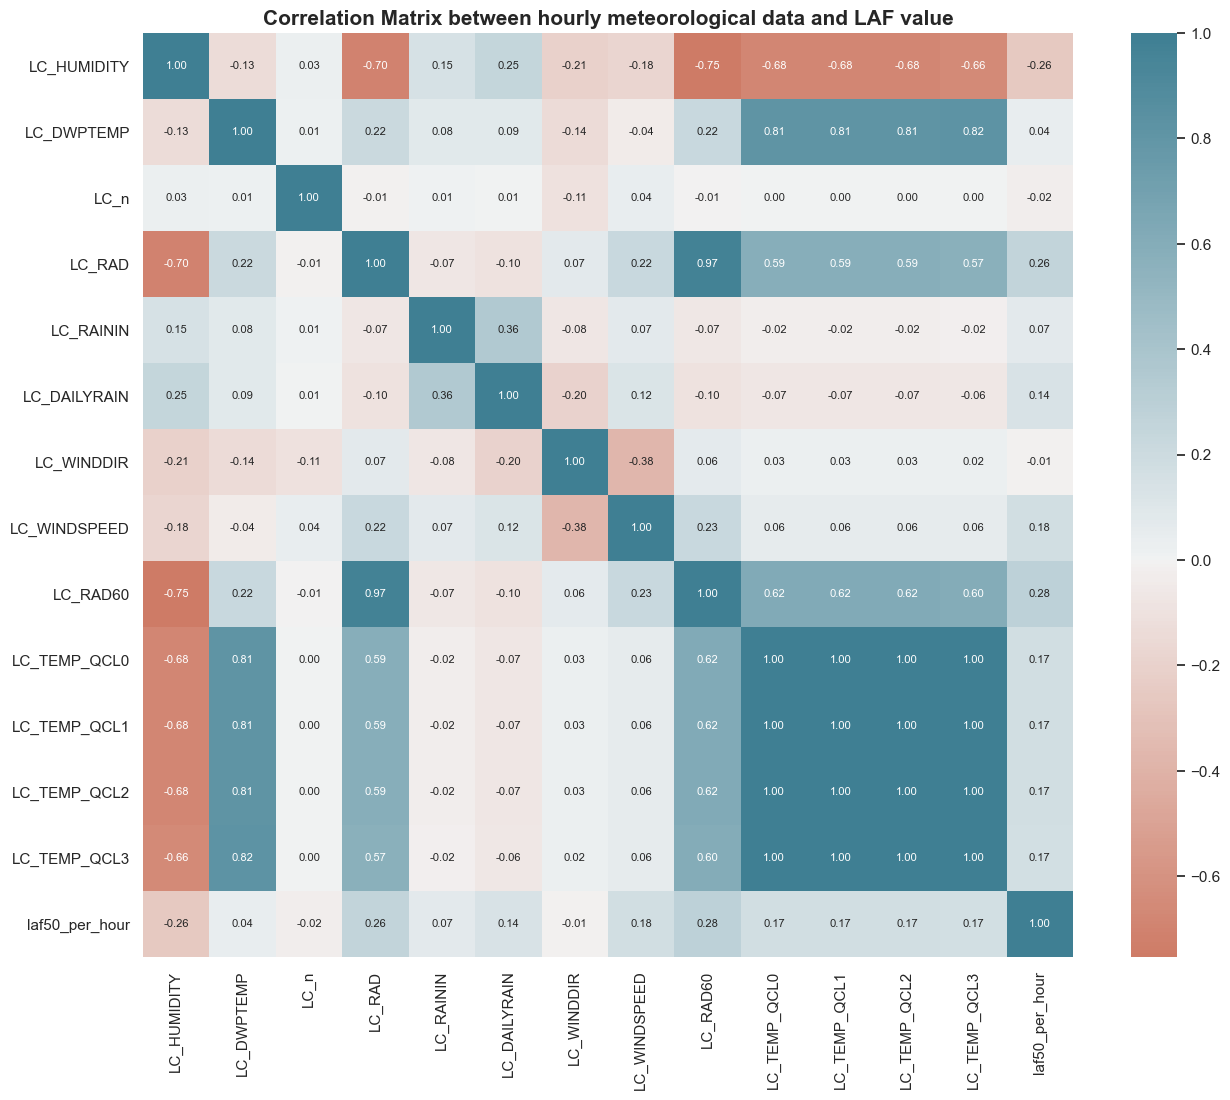

In [283]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=meteo_noise_hourly_mean.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, center=0, annot_kws={"size": 8})
plt.title("Correlation Matrix between hourly meteorological data and LAF value",size=15, weight='bold')
plt.show()